In [1]:
import glob as glob
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.offsetbox import AnchoredText

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
CMAP = plt.cm.plasma
CMAP_R = plt.cm.plasma_r
COLORS = [CMAP(i / 4.0) for i in range(5)]

In [4]:
COLOR_0 = COLORS[0]
COLOR_1 = COLORS[1]
COLOR_2 = COLORS[2]
COLOR_3 = COLORS[3]

In [5]:
TEXTWIDTH = 3.25063
FONTSIZE = 6

In [6]:
def setup():
    matplotlib.rcParams.update({"font.size": FONTSIZE})  # controls default text sizes
    matplotlib.rcParams.update({"axes.titlesize": FONTSIZE})  # fontsize of the axes title
    matplotlib.rcParams.update({"axes.labelsize": FONTSIZE})  # fontsize of the x and y labels
    matplotlib.rcParams.update({"axes.formatter.use_mathtext": True})  # use scientific notation for axes with pretty formatting
    matplotlib.rcParams.update({"axes.formatter.useoffset": True}) #
    matplotlib.rcParams.update({"axes.formatter.limits": [0, 0]})  
    matplotlib.rcParams.update({"xtick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"ytick.labelsize": FONTSIZE})  # fontsize of the tick labels
    matplotlib.rcParams.update({"legend.fontsize": FONTSIZE})  # legend fontsize
    matplotlib.rcParams.update({"figure.titlesize": FONTSIZE})  # fontsize of the figure title

In [12]:
setup()

In [13]:
def load_precisions(filenames):
    filenames = sorted(filenames)
    scaler = MinMaxScaler()
    precisions = []
    unscaled_prec = [np.loadtxt(file) for file in filenames]
    for i in range(len(unscaled_prec)):
        prec = np.abs(unscaled_prec[i])
        prec = scaler.fit_transform(prec.reshape(-1,1)).ravel()
        precisions.append(prec)
    return precisions
    

# SE1

In [14]:
x = np.arange(1, 19)
x_labels = [i if i in (1,3,7,8,9) else "" for i in range(1, 19)]

## RFFNet scaling

In [15]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnet_scaling/se1/precisions/*.txt"))

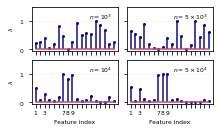

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.55))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0])
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 10^3$", loc=1, frameon=False)
ax1.add_artist(anchored_text)
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

conf = ax2.stem(x, rff_precisions[1])
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 5 \times 10^3$", loc=1, frameon=False)
ax2.add_artist(anchored_text)
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()

conf = ax3.stem(x, rff_precisions[2])
ax3.set_xlabel("Feature index")
ax3.set_ylabel("$\lambda$")   
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 10^4$", loc=1, frameon=False)
ax3.add_artist(anchored_text)
ax3.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax3.xaxis.grid()

conf = ax4.stem(x, rff_precisions[3])
ax4.set_xlabel(r"Feature index")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 5 \times 10^4$", loc='upper right', frameon=False)
ax4.add_artist(anchored_text)

ax4.grid(alpha=0.3, linewidth=0.5, linestyle='dashed')
ax4.xaxis.grid()

plt.xticks(x, x_labels)
plt.ylim(-0.05, 1.5)
plt.savefig("../se1/rff_precisions.pdf", bbox_inches="tight")
plt.show()


## Comparisom

In [17]:
ard_precisions = load_precisions(glob.glob("../../eval/benchmarks/ard/se1/precisions/precisions.txt"))
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnet/se1/precisions/precisions.txt"))
srff_precisions = load_precisions(glob.glob("../../eval/benchmarks/srff/se1/precisions/precisions.txt"))

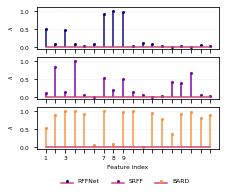

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.8))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_0)
plt.setp(conf[1], color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax2.stem(x, srff_precisions[0], label="SRFF")
ax2.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=2, color=COLOR_1)
plt.setp(conf[1], color=COLOR_1)
plt.setp(conf[2], color=COLOR_2)
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax3.stem(x, ard_precisions[0], label="BARD")
ax3.set_ylabel("$\lambda$")
ax3.set_xlabel("Feature index")
plt.setp(conf[0], ms=2, color=COLOR_3)
plt.setp(conf[1], color=COLOR_3)
plt.setp(conf[2], color=COLOR_2)
ax3.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax3.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), ncols=3, loc=9, frameon=False )

plt.xticks(x, x_labels)
plt.ylim(-0.05, 1.1)
plt.savefig("../se1/comparisom.pdf", bbox_inches="tight")
plt.show()

# SE2

In [19]:
x = np.arange(1, 101)
x_labels = [1, 20, 40, 60, 80, 100]

## RFFNet scaling

In [20]:
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnet_scaling/se2/precisions/*.txt"))

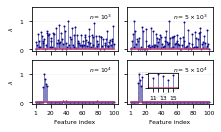

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.55))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0])
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 10^3$", loc=1, frameon=False)
ax1.add_artist(anchored_text)
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

conf = ax2.stem(x, rff_precisions[1])
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()


anchored_text = AnchoredText(r"$n = 5 \times 10^3$", loc=1, frameon=False)
ax2.add_artist(anchored_text)

conf = ax3.stem(x, rff_precisions[2])
ax3.set_xlabel("Feature index")
ax3.set_ylabel("$\lambda$")   
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax3.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax3.xaxis.grid()

anchored_text = AnchoredText(r"$n = 10^4$", loc=1, frameon=False)
ax3.add_artist(anchored_text)

conf = ax4.stem(x, rff_precisions[3])
ax4.set_xlabel("Feature index")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

anchored_text = AnchoredText(r"$n = 5 \times 10^4$", loc=1, frameon=False)
ax4.add_artist(anchored_text)

axins = ax4.inset_axes([0.25, 0.35, 0.35, 0.35])
conf = axins.stem(x, rff_precisions[3])
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.5, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)

axins.set_xlim(10, 16)
axins.set_xticks(range(11, 16), [11, None, 13, None, 15])
#axins.set_xticklabels([])
axins.set_yticklabels([])
ax4.indicate_inset_zoom(axins, edgecolor="black", alpha=0.1, linestyle='dashed')
ax4.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax4.xaxis.grid()

plt.xticks(x_labels, x_labels)
plt.ylim(-0.05, 1.5)
plt.savefig("../se2/rff_precisions.pdf", bbox_inches="tight")
plt.show()

## Comparisom

In [22]:
ard_precisions = load_precisions(glob.glob("../../eval/benchmarks/ard/se2/precisions/precisions.txt"))
rff_precisions = load_precisions(glob.glob("../../eval/benchmarks/rffnet/se2/precisions/precisions.txt"))
srff_precisions = load_precisions(glob.glob("../../eval/benchmarks/srff/se2/precisions/precisions.txt"))

In [23]:
x_prime = [1, 11, 12, 13, 14, 15, 20, 40, 60, 80, 100]
x_labels = [1, 20, 40, 60, 80, 100]

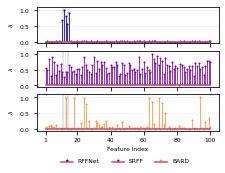

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True, 
                                            figsize=(TEXTWIDTH, TEXTWIDTH*0.7))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax1.stem(x, rff_precisions[0], label="RFFNet")
ax1.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_0)
plt.setp(conf[1], lw=0.8, color=COLOR_0)
plt.setp(conf[2], color=COLOR_2)
ax1.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax1.xaxis.grid()

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax2.stem(x, srff_precisions[0], label="SRFF")
ax2.set_ylabel("$\lambda$")
plt.setp(conf[0], ms=1, color=COLOR_1)
plt.setp(conf[1], lw=0.8, color=COLOR_1)
plt.setp(conf[2], color=COLOR_2)
ax2.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax2.xaxis.grid()

fig.subplots_adjust(hspace=0.2, wspace=0.1)
conf = ax3.stem(x, ard_precisions[0], label="BARD")
ax3.set_ylabel("$\lambda$")
ax3.set_xlabel("Feature index")
plt.setp(conf[0], ms=1, color=COLOR_3)
plt.setp(conf[1], lw=0.8, color=COLOR_3)
plt.setp(conf[2], color=COLOR_2)
ax3.grid(alpha=0.3, linestyle='dashed', linewidth=0.5)
ax3.xaxis.grid()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), ncols=3, loc=9, frameon=False )

ax1.bar([11, 12, 13, 14, 15], 1.1, color="k", alpha=0.1, width=0.7)
ax1.bar([11, 12, 13, 14, 15], -0.05, color="k", alpha=0.1, width=0.7)
ax2.bar([11, 12, 13, 14, 15], 1.1, color="k", alpha=0.1, width=0.7)
ax2.bar([11, 12, 13, 14, 15], -0.05, color="k", alpha=0.1, width=0.7)
ax3.bar([11, 12, 13, 14, 15], 1.1, color="k", alpha=0.1, width=0.7)
ax3.bar([11, 12, 13, 14, 15], -0.05, color="k", alpha=0.1, width=0.7)

plt.xticks(x_labels, x_labels)
plt.ylim(-0.05, 1.1)
plt.savefig("../se2/comparisom.pdf", bbox_inches="tight")
plt.show()